In [ ]:
import torch
# Import MNIST
from torchvision import datasets
from torchvision.datasets import MNIST

# Define the path to save the dataset
data_path = 'data'
# Download the MNIST dataset
mnist_train = MNIST(root=data_path, train=True, download=True)
mnist_test = MNIST(root=data_path, train=False, download=True)
# Print the size of the training and test datasets
print(f"Training dataset size: {len(mnist_train)}")
print(f"Test dataset size: {len(mnist_test)}")
print("MNIST dataset downloaded successfully.")


Training dataset size: 60000
Test dataset size: 10000
MNIST dataset downloaded successfully.
torch.Size([60000, 28, 28])


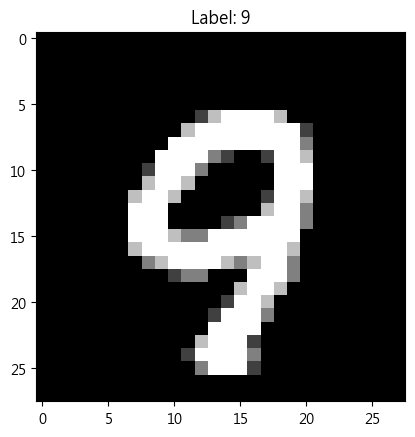

In [14]:
# Print the first image and label
import matplotlib.pyplot as plt
import random
idx = random.randint(0, len(mnist_train) - 1)
plt.imshow(mnist_train.data[idx], cmap='gray')
plt.title(f"Label: {mnist_train.targets[idx]}")
plt.show()

In [42]:
import torch

class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            # torch.nn.ReLU(),
            torch.nn.Linear(128, 10)
        )

    def forward(self, x):
        out = self.fc(x)
        return out

In [43]:
from torch.utils.data import TensorDataset, DataLoader

test = torch.tensor(list(range(100)))
test_dataset = TensorDataset(test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for batch, in test_loader:
    print(batch.shape, batch)

# for idx in range(0, len(test), 32):
#     batch = test[idx:idx+32]

torch.Size([32]) tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
torch.Size([32]) tensor([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
torch.Size([32]) tensor([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])
torch.Size([4]) tensor([96, 97, 98, 99])


In [40]:
train_X = mnist_train.data.view(60000, 28*28).float() / 255.0
train_y = mnist_train.targets

# dataloader
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
print(train_X.shape, train_y.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [46]:
# Train the model
model = LinearRegression()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        # print(batch_X.shape, batch_y.shape)
        # torch.Size([64, 784]) torch.Size([64])
        outputs = model(batch_X)
        # print(outputs.shape, batch_y.shape)
        # torch.Size([64, 10]) torch.Size([64])
        
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/10], Loss: {loss:.4f}")

Epoch [1/10], Loss: 1.0599
Epoch [2/10], Loss: 0.4702
Epoch [3/10], Loss: 0.3912
Epoch [4/10], Loss: 0.3591
Epoch [5/10], Loss: 0.3406
Epoch [6/10], Loss: 0.3285
Epoch [7/10], Loss: 0.3195
Epoch [8/10], Loss: 0.3126
Epoch [9/10], Loss: 0.3071
Epoch [10/10], Loss: 0.3024
